# IMPORTING THE LIBRARYS

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

// The first step is to import the librarys for data analysis.
numpy is for numerical operations,pandas is for data manipulation and analysis,warning is a built in function it manages warnings while execution,seaborn is for data visualization.

## MOUNT THE GOOGLE DRIVE


In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## IMPORTING THE DATASET

In [ ]:
df = pd.read_csv('/content/drive/My Drive/retail_sales_dataset.csv')

// 'df' is a variable,pd is to read the data from the spacified file,read_csv() it is a function from pandas,/content/drive/My Drive/retail_sales_dataset.csv.  it is the path to access the file.

In [ ]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


// I used .head() to show the first 5 rows of data present in the file.

In [ ]:
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


// I used .tail() to show the last 5 rows of data present in the file it works same like .head().

## DISCRIBING THE DATASET

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


// .info() is used to provide column details and the type of data is used and also the memory storage.

In [ ]:
df.shape

(1000, 9)

// .shape is used for knowing how many rows and columns are present.

In [ ]:
df.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


// .isnull() is check wether there are any null values present in the file if we use .sum() we can see the how many values are null.

# VISUALIZEING THE DATASET

In [ ]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


// .describe is used to COUNT the data values inculuding the **mean, median, mode, standard deviation**.

In [ ]:
for col in df.columns:
  print(f"'{col}': {df[col].nunique()}")

'Transaction ID': 1000
'Date': 345
'Customer ID': 1000
'Gender': 2
'Age': 47
'Product Category': 3
'Quantity': 4
'Price per Unit': 5
'Total Amount': 18


//I used for loop is to check wether are there any unique values present.

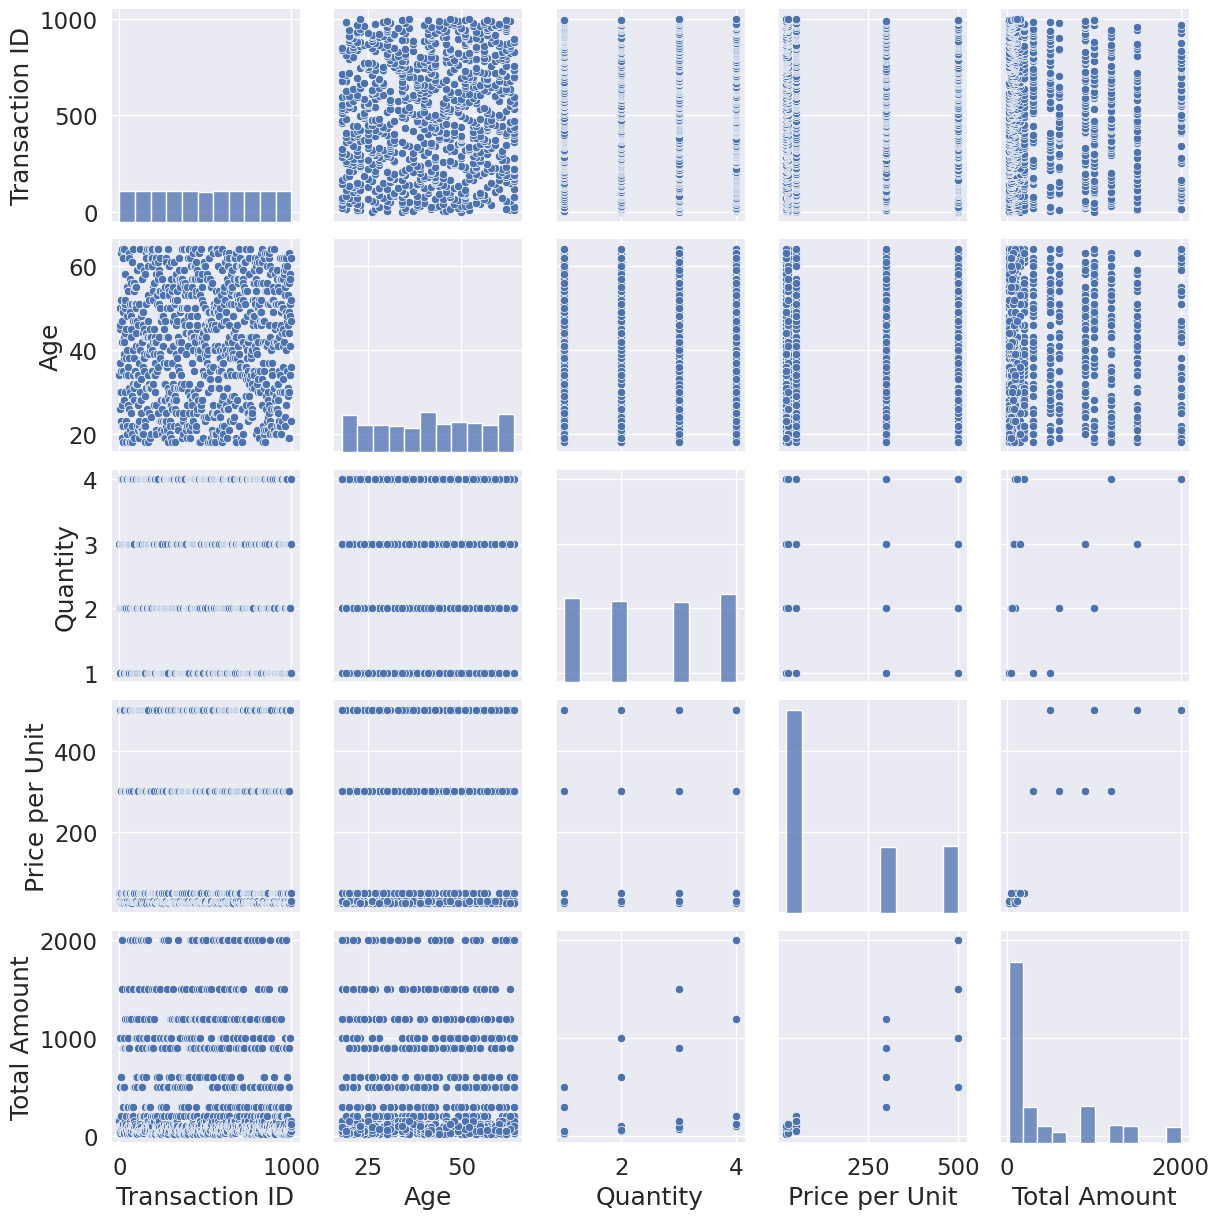

In [ ]:
sns.pairplot(df)

// seaborn.pairplot() function to create a pair plot for every columns

# COUNTING THE PRODUCT CATEGORY

In [ ]:
df['Product Category'].value_counts()

,count
Product Category,
Clothing,351
Electronics,342
Beauty,307


// .valuecount() is used for counting how many values are present.

# REPRESTING THE BAR GRAPH

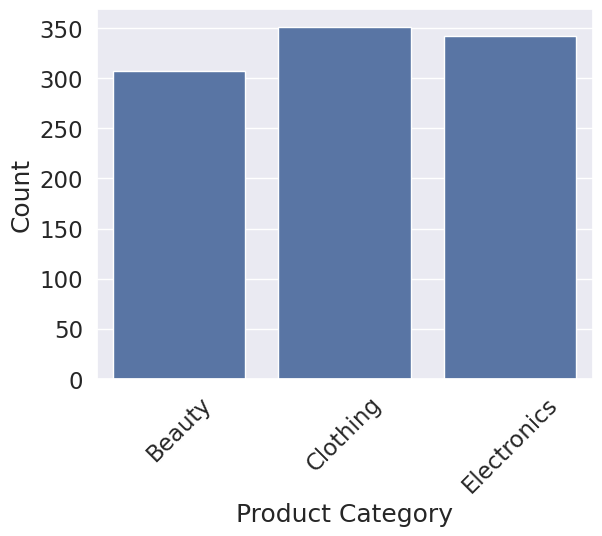

In [ ]:
sns.countplot(x=df['Product Category'])
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

// .show is used to show the graph.

# GROUPING THE DATA.

In [ ]:
df.groupby("Product Category")[["Quantity", "Total Amount"]].sum()

,Quantity,Total Amount
Product Category,,
Beauty,771,143515
Clothing,894,155580
Electronics,849,156905


// .groupby is used for spliting the columns and can be used for combining for our purpose.

# COMPARING USING BAR GRAPH

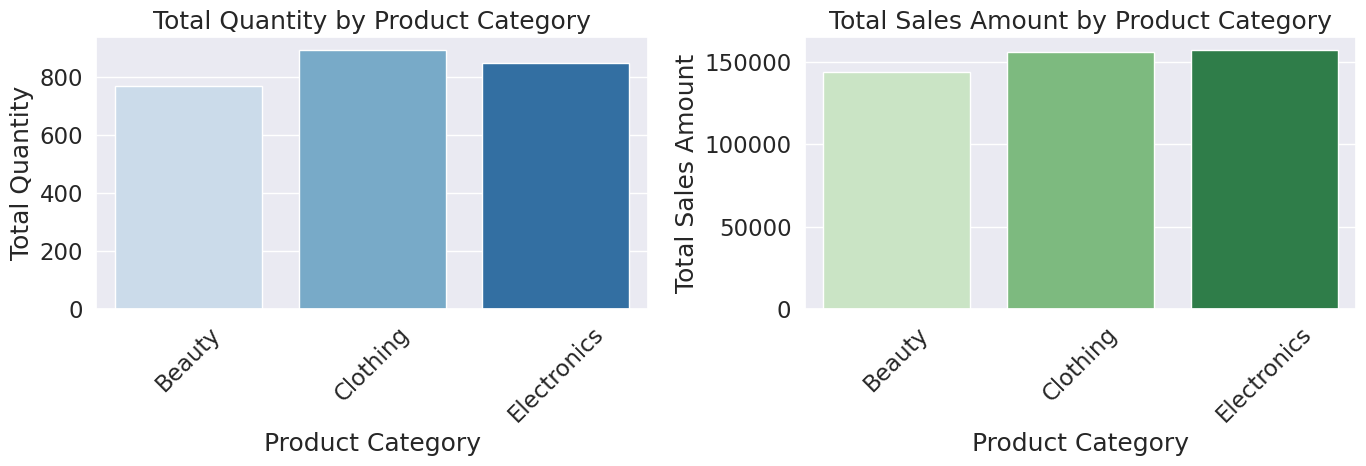

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
category_summary = df.groupby("Product Category")[["Quantity", "Total Amount"]].sum()
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.barplot(x=category_summary.index, y=category_summary["Quantity"], ax=ax[0], palette='Blues')
ax[0].set_title('Total Quantity by Product Category')
ax[0].set_xlabel('Product Category')
ax[0].set_ylabel('Total Quantity')
ax[0].tick_params(axis='x', rotation=45)
sns.barplot(x=category_summary.index, y=category_summary["Total Amount"], ax=ax[1], palette='Greens')
ax[1].set_title('Total Sales Amount by Product Category')
ax[1].set_xlabel('Product Category')
ax[1].set_ylabel('Total Sales Amount')
ax[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# CREATING THE PIE CHART

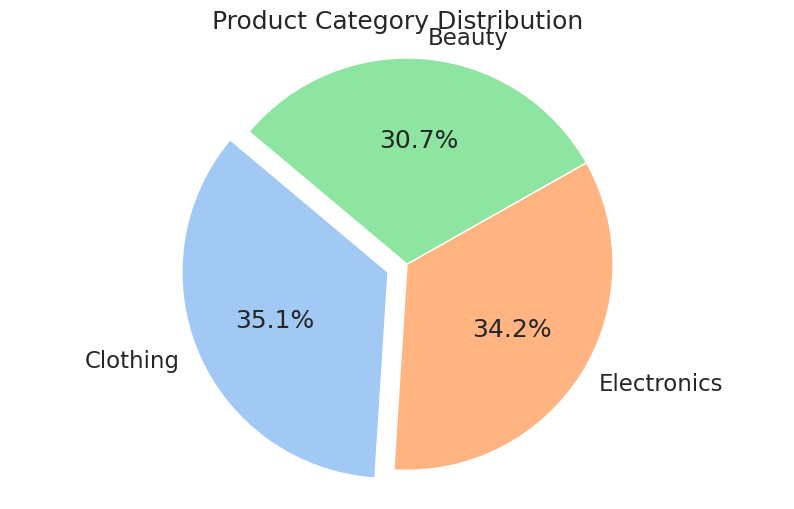

In [ ]:
category_counts = df["Product Category"].value_counts()
explode_list = [0.1 if i == category_counts.idxmax() else 0 for i in category_counts.index]
plt.figure(figsize=(10, 6))
plt.pie(
    category_counts,
    labels=category_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel')[0:len(category_counts)],
    explode=explode_list,)
plt.title('Product Category Distribution')
plt.axis('equal')
plt.show()

# NUMBER OF ENTRYS ON THE PARTICULAR MONTH

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df ['Month'] = df ['Date'].dt.month_name()
df['Month']

,Month
0,November
1,February
2,January
3,May
4,May
...,...
995,May
996,November
997,October
998,December


In [ ]:
monthly_sales = df.groupby('Month')['Total Amount'].sum().sort_values(ascending=False)
display(monthly_sales)

,Total Amount
Month,
May,53150
October,46580
December,44690
February,44060
January,36980
August,36960
June,36715
July,35465
November,34920


## TOTAL SALES AMOUNT ON EACH MONTH

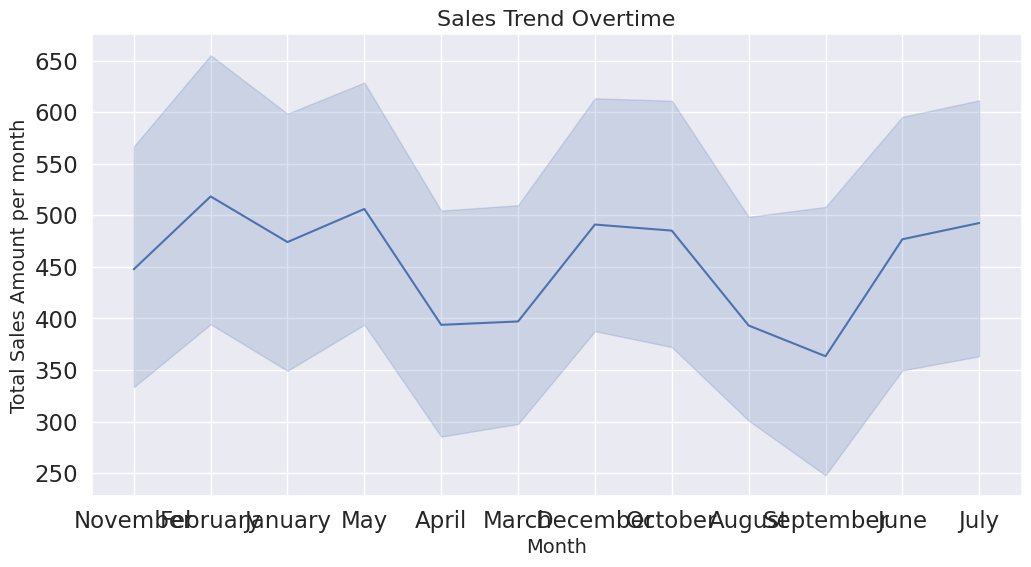

In [ ]:
plt.figure(figsize=(12,6))

sns.lineplot(x="Month", y="Total Amount", data= df)

plt.title("Sales Trend Overtime", fontsize=16)

plt.xlabel("Month", fontsize=14)

plt.ylabel("Total Sales Amount per month", fontsize=14)

plt.show()

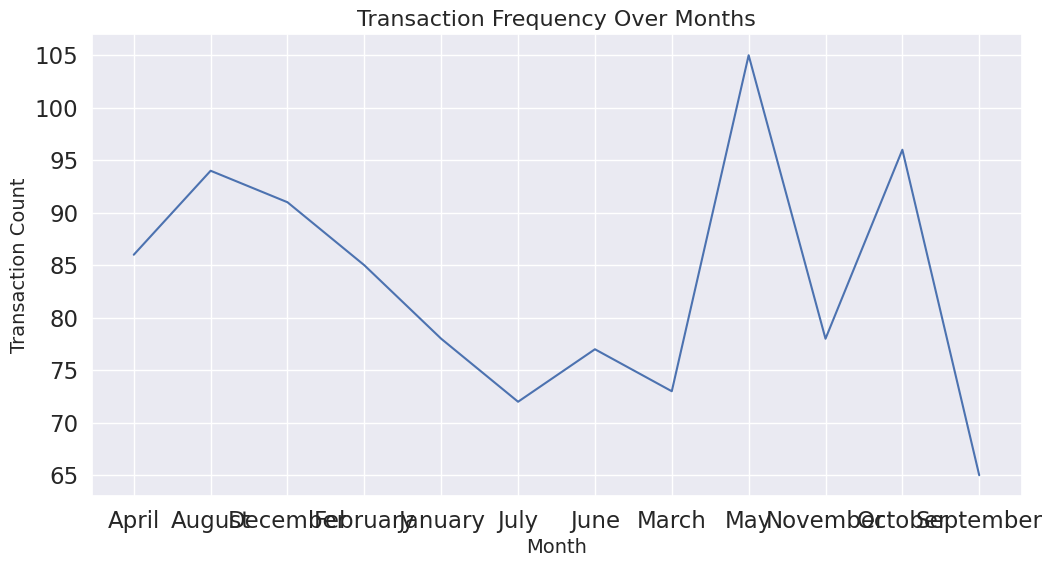

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the transaction count per month
transaction_count = df.groupby('Month')['Transaction ID'].count()

# Create line plot for transaction count over months
plt.figure(figsize=(12,6))
sns.lineplot(x=transaction_count.index, y=transaction_count.values)

plt.title("Transaction Frequency Over Months", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Transaction Count", fontsize=14)

plt.show()

## TRANSACTION FREQUENCE OVER EACH MONTH

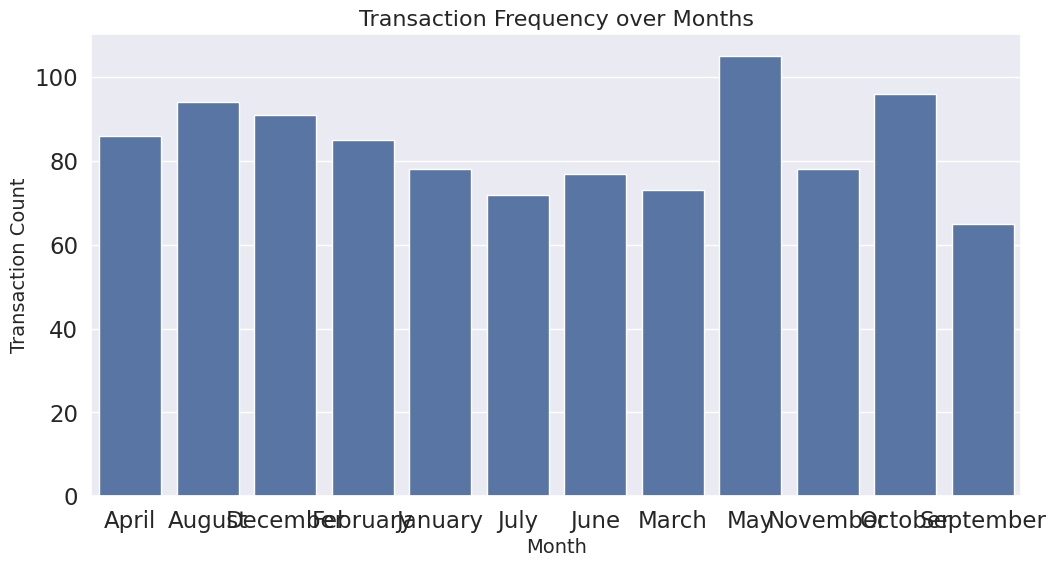

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=transaction_count.index, y=transaction_count.values)
plt.title("Transaction Frequency over Months", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel ("Transaction Count", fontsize=14)
plt.show()

## SALES HEATMAP

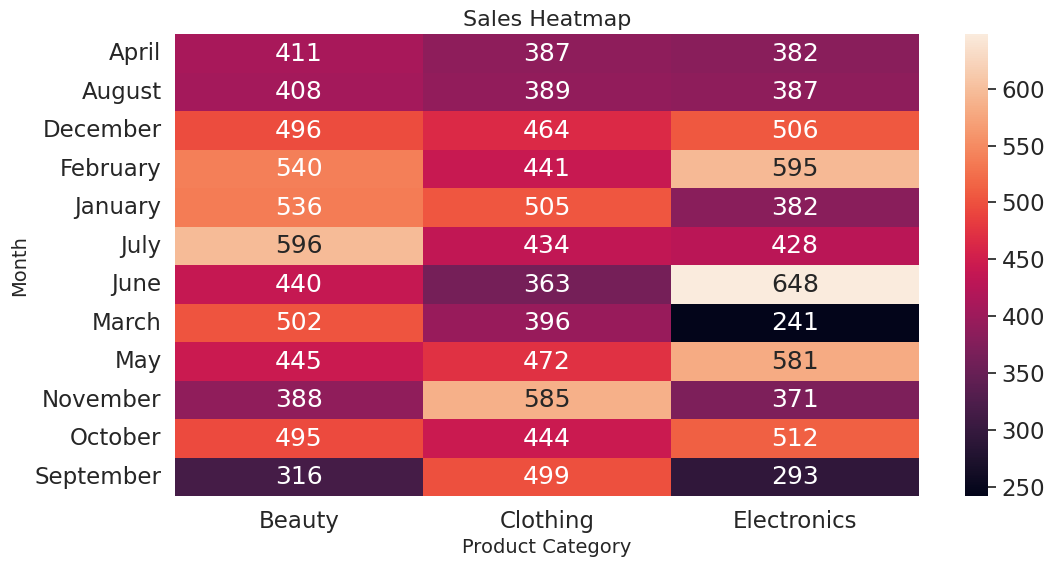

In [ ]:
heatmap = df.pivot_table(index='Month', columns='Product Category', values='Total Amount')
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap, annot=True, fmt='.0f')
plt.title("Sales Heatmap", fontsize=16)
plt.xlabel("Product Category", fontsize=14)
plt.ylabel("Month", fontsize=14)
plt.show()

TO

In [ ]:
df['Age'].count()
gender_counts = df['Gender'].value_counts()
display(gender_counts)


,count
Gender,
Female,510
Male,490


## PIE CHART OF GENDER

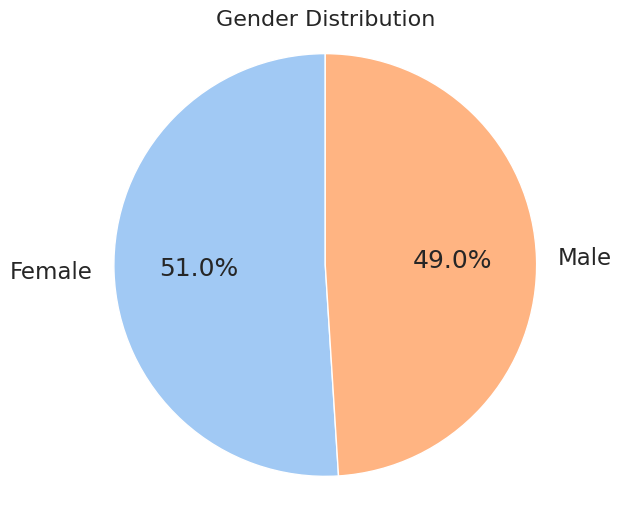

In [ ]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel')[0:len(gender_counts)],
    radius=0.5
)
plt.title('Gender Distribution', fontsize=16)
plt.axis('equal')
plt.show()

SAPARTING THE AGE

In [ ]:
age_a=[0,18,25,35,50, 100]
age_groups=['0-18','19-25','26-35','36-50','50+']
df['Age Group']= pd.cut(df['Age'],bins=age_a,labels=age_groups, right=False)
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Age Group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,November,26-35
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,February,26-35
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,January,50+
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,May,36-50
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,May,26-35


## DISTRIBUTION OF AGE AND GENDER

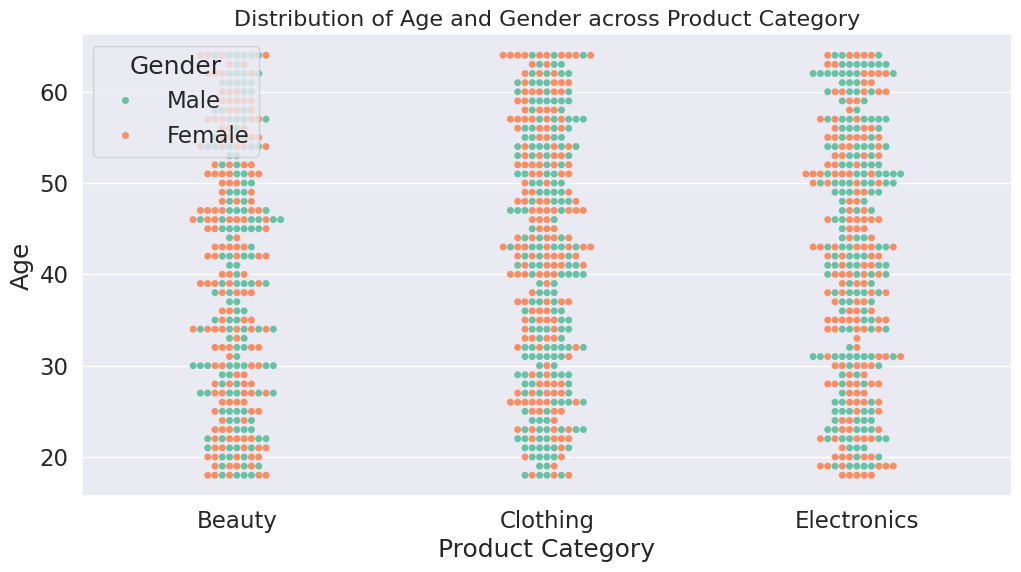

In [ ]:
plt.figure(figsize=(12,6))
sns.swarmplot(x='Product Category', y='Age', hue='Gender', data=df, palette='Set2')
plt.title('Distribution of Age and Gender across Product Category', fontsize=16)
plt.show()

<Axes: title={'center': 'Age of the person'}, xlabel='Age', ylabel='count'>

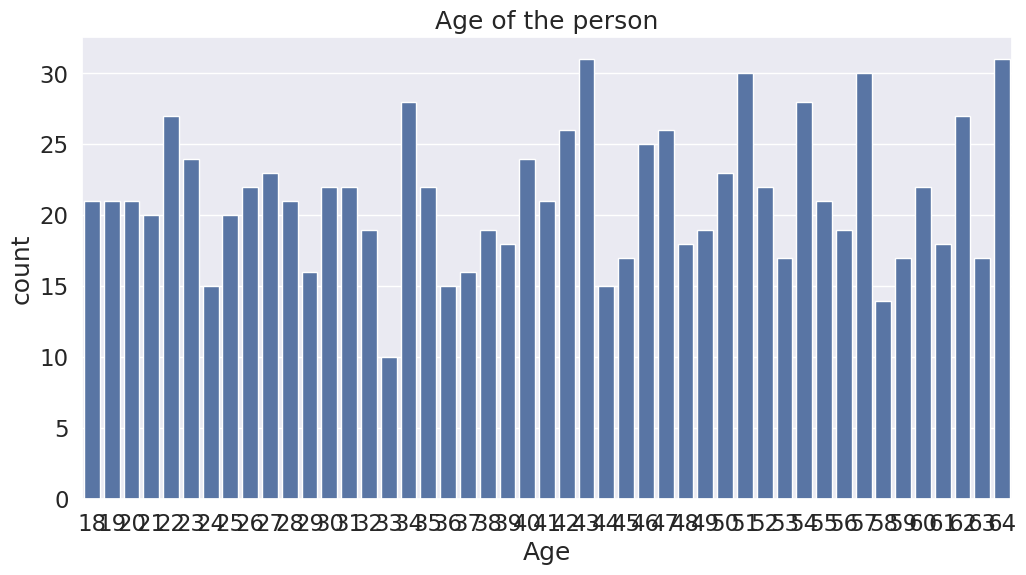

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Age of the person")
plt.xlabel("Age")
sns.countplot(x='Age', data=df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   Month             1000 non-null   object        
 10  Age Group         1000 non-null   category      
dtypes: category(1), datetime64[ns](1), int64(5), object(4)
memory usage: 79.4+ KB


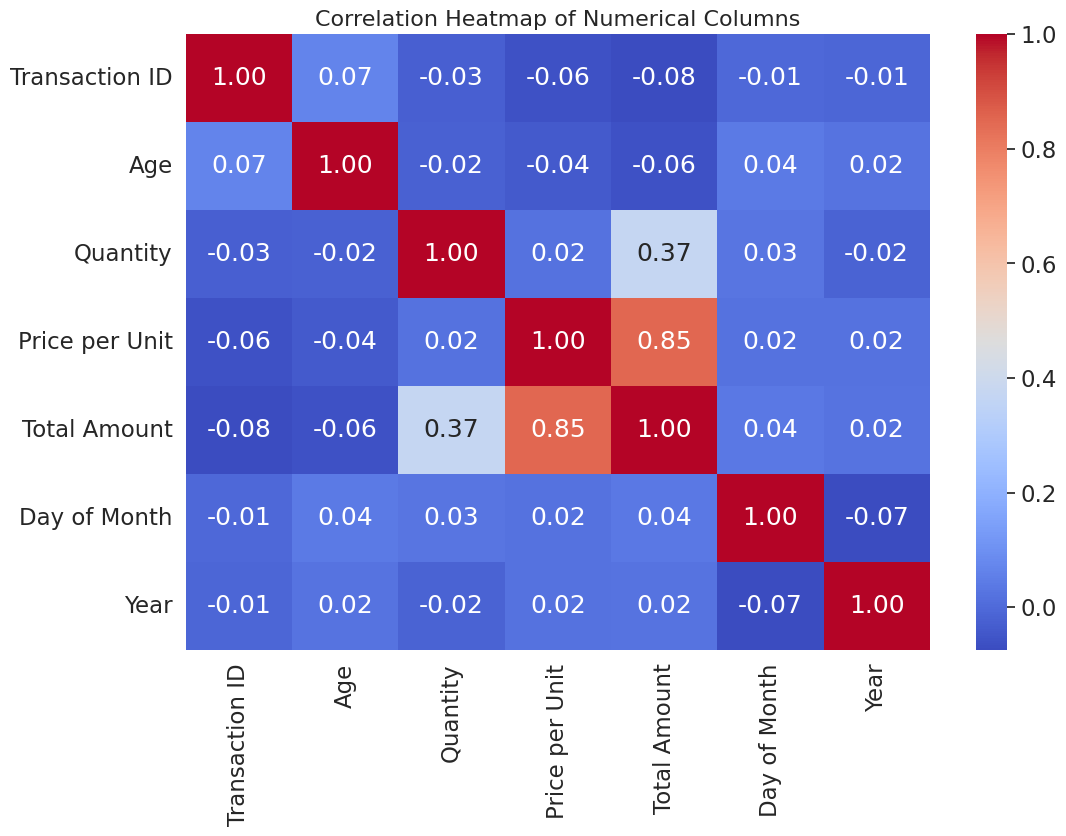

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Columns', fontsize=16)
plt.show()

Unveiling Insights from Product Price Distribution within Each Category

Exploring data insights to answer the question "What insights can be gleaned from the distribution of product prices within each category?" reveals intriguing patterns that shed light on consumer behavior and preferences. Here's a breakdown of the findings:

Top-Selling Items at Same Price levels:

Within the Clothing category, the highest-selling items are priced at 25, 30, 50, and 300. Sales figures indicate 184 (35.2%), 171 (38.4%), 189 (35.4%), and 193 (37.3%) units sold, respectively.
Interestingly, both Beauty and Electronics categories perform exceptionally well at a price point of 500, with an equal share of 34.1%, totaling 169 units each.
Sales Volume Across Price levels, Compared within Each Product Category:

In the Beauty category, products sell best at prices of 50 -> 500 -> 25 -> 300 -> 30.
For Clothing items, the highest sales are observed at prices of 300 -> 50 -> 25 -> 30 -> 500.
Similarly, Electronics products perform well at prices of 300 -> 25 -> 50 -> 500 -> 30.
These insights provide valuable information for businesses to understand consumer preferences and tailor their product offerings and marketing strategies accordingly. By aligning product pricing with customer preferences, businesses can optimize sales and enhance customer satisfaction, ultimately driving growth and success in the market.